## **Assignment 05 : Data Augmentation**

### **Task 1 : Data Augmentation**

Instaling Required Libraries

In [99]:
%pip install -q torch torchvision augly pillow pandas matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


Importing Required Libraries

In [6]:
#importing required libraries
import os
import shutil
from sklearn.model_selection import train_test_split
from pathlib import Path
import augly.image as imaugs
import augly.utils as utils
import random
from PIL import Image
import numpy as np
from augly.image import functional as augly_image
import os
from tqdm import tqdm
import glob

Dataset Preparation

In [7]:
#defining paths
dataset_path = Path("dataset")
output_dir = Path("cats_dogs_dataset")
train_dir = output_dir / "train"
test_dir = output_dir / "test"

#creating train and test directories
for subdir in [train_dir / "cats", train_dir / "dogs", test_dir / "cats", test_dir / "dogs"]:
    subdir.mkdir(parents=True, exist_ok=True)

#getting image file paths
cat_images = list((dataset_path / "cats").glob("*.jpg"))
dog_images = list((dataset_path / "dogs").glob("*.jpg"))

#splitting the dataset into train-test dataset
train_cats, test_cats = train_test_split(cat_images, test_size=0.2, random_state=42)
train_dogs, test_dogs = train_test_split(dog_images, test_size=0.2, random_state=42)

#function to copy images
def copy_images(file_list, dest_dir):
    for file in file_list:
        shutil.copy(file, dest_dir)

#copying images to train and test directories
copy_images(train_cats, train_dir / "cats")
copy_images(test_cats, test_dir / "cats")
copy_images(train_dogs, train_dir / "dogs")
copy_images(test_dogs, test_dir / "dogs")

#checking the number of train and test dataset
print(f"Train set: {len(train_cats)} cats, {len(train_dogs)} dogs")
print(f"Test set: {len(test_cats)} cats, {len(test_dogs)} dogs")

Train set: 56 cats, 56 dogs
Test set: 14 cats, 14 dogs


Defining a function for Data Augmentation

In [8]:
#setting random seed for reproducibility
random.seed(42)

#list of augmentation functions
augmentations = [
    lambda img: augly_image.rotate(img, degrees=random.uniform(-65, 65)),
    lambda img: augly_image.crop(img, x1=random.uniform(0, 0.2), y1=random.uniform(0, 0.2), x2=random.uniform(0.8, 1.0), y2=random.uniform(0.8, 1.0)),
    lambda img: augly_image.blur(img, radius=random.uniform(0.5, 2.0)),
    lambda img: augly_image.brightness(img, factor=random.uniform(0.5, 1.5)),
    lambda img: augly_image.contrast(img, factor=random.uniform(0.5, 1.5)),
    lambda img: augly_image.saturation(img, factor=random.uniform(0.5, 1.5)),
    lambda img: augly_image.hflip(img),
    lambda img: augly_image.vflip(img),
    lambda img: augly_image.scale(img, factor=random.uniform(0.5, 1.5)),
    lambda img: augly_image.pad(img, w_factor=random.uniform(0.1, 0.3), h_factor=random.uniform(0.1, 0.3)),
    lambda img: augly_image.random_noise(img, mean=random.uniform(0, 0.1)),
]

#defining a function to apply multiple random augmentations
def augment_image(image_path, output_dir, img_name):
    image = Image.open(image_path).convert("RGB")
    
    #setting a random seed
    random.seed(42)

#applying three random transformations twice
    for i in range(2):  #augment twice for a single image
        aug_image = image
        chosen_augs = random.sample(augmentations, 3)  #selecting 3 different augmentations
        for aug in chosen_augs:
            aug_image = aug(aug_image)
        
        #saving augmented image
        aug_image.save(f"{output_dir}/{img_name}_aug{i+1}.jpg")

Applying Augmentation to the Train Set

In [9]:
#adding path for directory with original and augmented dataset
train_dir = "cats_dogs_dataset/train"  
augmented_dir = "augmented_train_folder"

#creating a base augmented directory
os.makedirs(f"{augmented_dir}/cats", exist_ok=True)
os.makedirs(f"{augmented_dir}/dogs", exist_ok=True)

#augmenting cat images
for img_path in tqdm(os.listdir(f"{train_dir}/cats")):
    augment_image(f"{train_dir}/cats/{img_path}", f"{augmented_dir}/cats", img_path)

#augmenting dog images
for img_path in tqdm(os.listdir(f"{train_dir}/dogs")):
    augment_image(f"{train_dir}/dogs/{img_path}", f"{augmented_dir}/dogs", img_path)

100%|██████████| 56/56 [00:05<00:00, 10.01it/s]


Dataset Statistics

In [10]:
print("Before Augmentation:")
print(f"Train Cats: {len(glob.glob(train_dir + '/cats/*.jpg'))}")
print(f"Train Dogs: {len(glob.glob(train_dir + '/dogs/*.jpg'))}")

print("After Augmentation:")
print(f"Augmented Train Cats: {len(glob.glob(augmented_dir + '/cats/*.jpg'))}")
print(f"Augmented Train Dogs: {len(glob.glob(augmented_dir + '/dogs/*.jpg'))}")

Before Augmentation:
Train Cats: 56
Train Dogs: 56
After Augmentation:
Augmented Train Cats: 112
Augmented Train Dogs: 112


Creating a final dataset

In [11]:
#creating a final dataset combining original and augmented images
final_train_dir = "final_train_dataset"
os.makedirs(final_train_dir, exist_ok=True)

#copying original images
def copy_original_images(source_dir, target_dir):
    os.makedirs(target_dir, exist_ok=True)
    for category in ["cats", "dogs"]:
        os.makedirs(f"{target_dir}/{category}", exist_ok=True)
        for img_name in os.listdir(f"{source_dir}/{category}"):
            shutil.copy(f"{source_dir}/{category}/{img_name}", f"{target_dir}/{category}/{img_name}")

#copying augmented images
def copy_augmented_images(source_dir, target_dir):
    for category in ["cats", "dogs"]:
        for img_name in os.listdir(f"{source_dir}/{category}"):
            shutil.copy(f"{source_dir}/{category}/{img_name}", f"{target_dir}/{category}/{img_name}")

#performing copying
train_dir = "cats_dogs_dataset/train"
augmented_dir = "augmented_train_folder"
copy_original_images(train_dir, final_train_dir)
copy_augmented_images(augmented_dir, final_train_dir)

In [12]:
#printing statistics for final dataset
print(f"Final Train Cats: {len(glob.glob(final_train_dir + '/cats/*.jpg'))}")
print(f"Final Train Dogs: {len(glob.glob(final_train_dir + '/dogs/*.jpg'))}")

Final Train Cats: 168
Final Train Dogs: 168


Bar Graphs for Counts

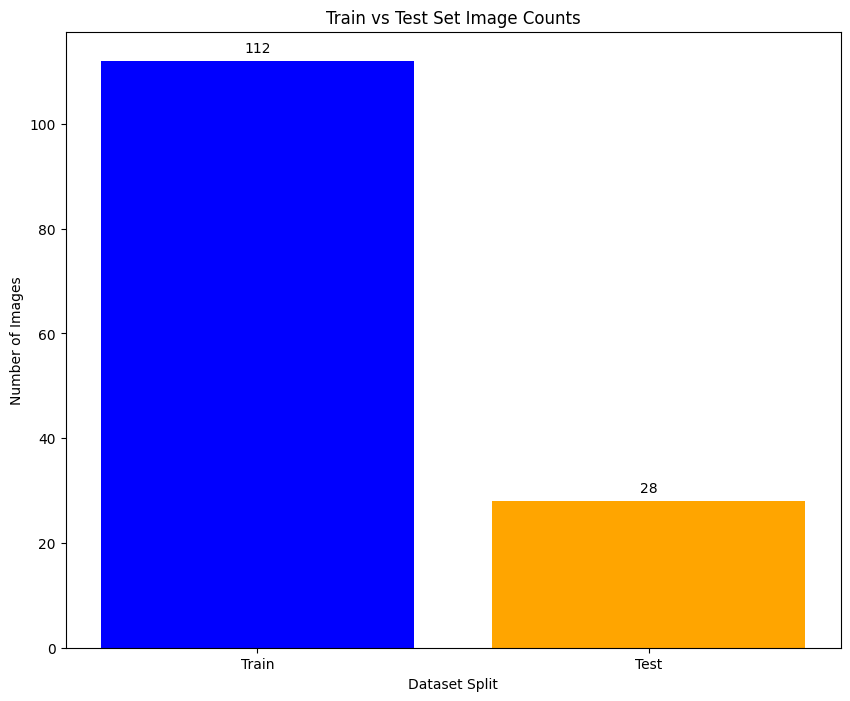

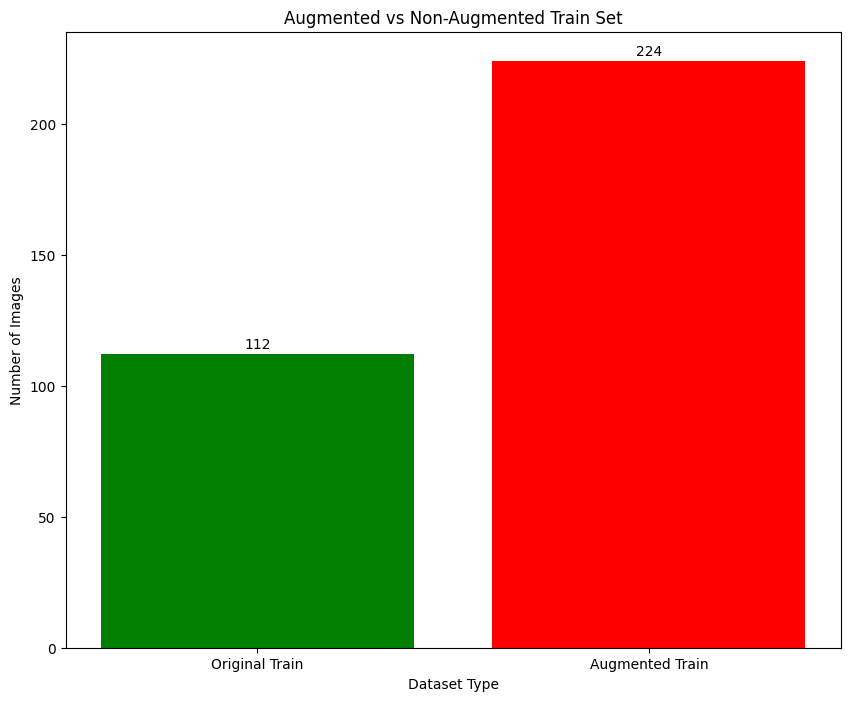

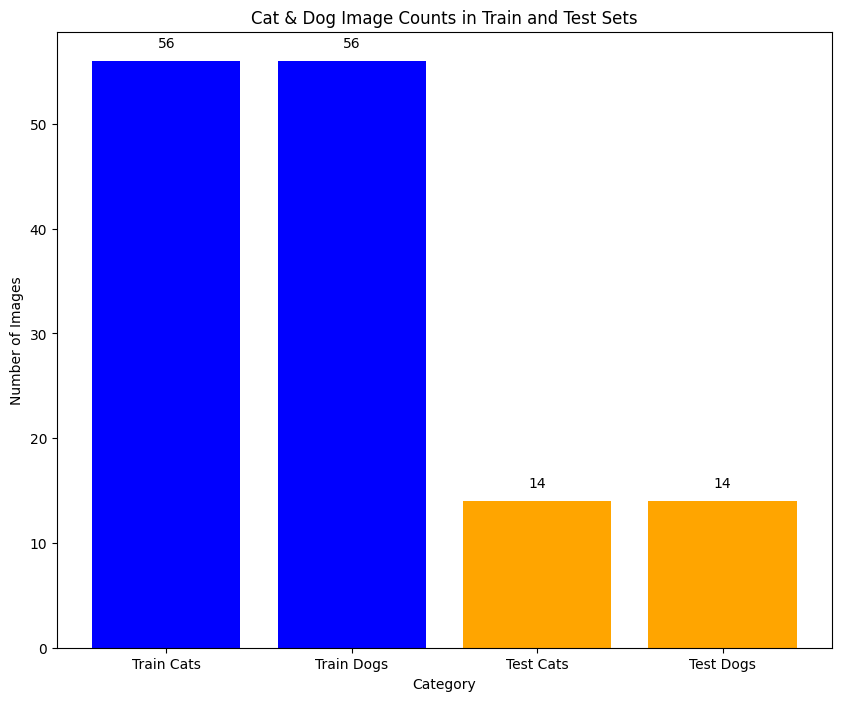

In [26]:
import matplotlib.pyplot as plt
import numpy as np

#obtained data
train_cats = 56
train_dogs = 56
test_cats = 14
test_dogs = 14
augmented_train_cats = 112
augmented_train_dogs = 112

#plot for Train v/s Test Set
plt.figure(figsize=(10, 8))
bars = plt.bar(["Train", "Test"], [train_cats + train_dogs, test_cats + test_dogs], color=['blue', 'orange'])
plt.xlabel("Dataset Split")
plt.ylabel("Number of Images")
plt.title("Train vs Test Set Image Counts")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, int(yval), ha='center', va='bottom', fontsize=10)

plt.show()

#plot for Augmented vs Non-Augmented Train Set
plt.figure(figsize=(10, 8))
bars = plt.bar(["Original Train", "Augmented Train"], [train_cats + train_dogs, augmented_train_cats + augmented_train_dogs], 
               color=['green', 'red'])
plt.xlabel("Dataset Type")
plt.ylabel("Number of Images")
plt.title("Augmented vs Non-Augmented Train Set")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, int(yval), ha='center', va='bottom', fontsize=10)

plt.show()

#plot for number of cat & dog images in Train & Test
categories = ["Train Cats", "Train Dogs", "Test Cats", "Test Dogs"]
counts = [train_cats, train_dogs, test_cats, test_dogs]
colors = ['blue', 'blue', 'orange', 'orange']
plt.figure(figsize=(10, 8))
bars = plt.bar(categories, counts, color=colors)
plt.xlabel("Category")
plt.ylabel("Number of Images")
plt.title("Cat & Dog Image Counts in Train and Test Sets")
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, int(yval), ha='center', va='bottom', fontsize=10)

plt.show()

### **Task 2 : Model Training**

Installing Required Libraries

In [9]:
%pip install transformers torch torchvision

Note: you may need to restart the kernel to use updated packages.


Importing Required Libraries

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from transformers import AutoModelForImageClassification, AutoConfig
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import copy

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading pre-trained ResNet-50 model from Hugging Face

In [2]:
def initialize_resnet50_from_scratch(num_labels=2):
    #loading the ResNet-50 config
    config = AutoConfig.from_pretrained("microsoft/resnet-50")
    
    #setting number of output classes i.e cats vs dogs
    config.num_labels = num_labels
    
    #creating model with random initialization i.e. no pretrained weights
    model = AutoModelForImageClassification.from_config(config)
    
    return model

#initializing two models with identical new weights
base_model = initialize_resnet50_from_scratch()
model_no_aug = copy.deepcopy(base_model)
model_aug = copy.deepcopy(base_model)

Checking two models have Identical Architecture initially

In [3]:
print(base_model)
print(model_no_aug)
print(model_aug)

ResNetForImageClassification(
  (resnet): ResNetModel(
    (embedder): ResNetEmbeddings(
      (embedder): ResNetConvLayer(
        (convolution): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (normalization): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (activation): ReLU()
      )
      (pooler): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    )
    (encoder): ResNetEncoder(
      (stages): ModuleList(
        (0): ResNetStage(
          (layers): Sequential(
            (0): ResNetBottleNeckLayer(
              (shortcut): ResNetShortCut(
                (convolution): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (normalization): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              )
              (layer): Sequential(
                (0): ResNetConvLayer(
                  (convolution): Conv2d(64

Model 1 : On Non Augmented Data

In [5]:
#setting up device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#initializing the model
model1 = model_no_aug.to(device)

#non-augmented transforms
non_aug_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                         std=[0.229, 0.224, 0.225]),
])

#loading non-augmented datasets
train_dataset = datasets.ImageFolder(
    root='cats_dogs_dataset/train',
    transform=non_aug_transform
)

test_dataset = datasets.ImageFolder(
    root='cats_dogs_dataset/test',
    transform=non_aug_transform
)

#creating dataloaders for training and test set
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

#training setup
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model1.parameters(), lr=0.001)

#training loop
num_epochs = 7
for epoch in range(num_epochs):
    model1.train()
    running_loss = 0.0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model1(images).logits
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    #printing statistics
    epoch_loss = running_loss / len(train_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

#evaluation
model1.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model1(images).logits
        _, preds = torch.max(outputs, 1)
        
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

#calculating metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='binary')
recall = recall_score(all_labels, all_preds, average='binary')
f1 = f1_score(all_labels, all_preds, average='binary')

print(f"\nTest Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Epoch [1/7], Loss: 1.0053
Epoch [2/7], Loss: 0.9059
Epoch [3/7], Loss: 0.7436
Epoch [4/7], Loss: 0.6791


KeyboardInterrupt: 

Model 2 : Augmented Data

In [4]:
#setting up device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#initializing the model
model2 = model_aug.to(device)

#augmented transforms
aug_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                         std=[0.229, 0.224, 0.225]),
])

##loading non-augmented dataset and test dataset
aug_dataset = datasets.ImageFolder(
    root='final_train_dataset',
    transform= aug_transform
)

test_dataset = datasets.ImageFolder(
    root='cats_dogs_dataset/test',
    transform= aug_transform
)

#creating dataloaders for augmented training and test set
aug_loader = DataLoader(aug_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

#training setup
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model2.parameters(), lr=0.001)

#training loop
num_epochs = 7  # Increased from 2 for better convergence
for epoch in range(num_epochs):
    model2.train()
    running_loss = 0.0
    
    for images, labels in aug_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model2(images).logits
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    #printing statistics
    epoch_loss = running_loss / len(aug_loader)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}')

#evaluation
model2.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        outputs = model2(images).logits
        _, preds = torch.max(outputs, 1)
        
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

#calculating metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='binary')  # Changed to binary
recall = recall_score(all_labels, all_preds, average='binary')
f1 = f1_score(all_labels, all_preds, average='binary')

print(f"\nTest Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Epoch [1/6], Loss: 1.2010
Epoch [2/6], Loss: 0.9261
Epoch [3/6], Loss: 0.7395
Epoch [4/6], Loss: 0.7249
Epoch [5/6], Loss: 0.6700
Epoch [6/6], Loss: 0.6615

Test Metrics:
Accuracy: 0.6071
Precision: 0.5652
Recall: 0.9286
F1 Score: 0.7027
